### Load dependencies

In [1]:
import os
import shutil
import time
import pickle
import random
import pandas as pd
import librosa
import librosa.display
import gc
import numpy as np
import urllib
import umap
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import colorcet as cc
import math
#import warnings
import seaborn as sns
import chirplet as ch
#warnings.filterwarnings('ignore')
%matplotlib notebook

In [ ]:
'''
path = '../sound_annotation_files_UMAP/'
csv = sorted(os.listdir(path))
sound_annotation_files = []
for i in csv:
    if i.endswith('.csv'):
        sound_annotation_files.append(path+i)

if len(sound_annotation_files)==1:
    labels= pd.read_csv(sound_annotation_files[0])
elif len(sound_annotation_files)==0:
    print('Must provide an annotation file')
elif len(sound_annotation_files)>1:
    labels = pd.read_csv(sound_annotation_files[0])
    for i in sound_annotation_files[1:]:
        tmp = pd.read_csv(i)
        labels = pd.concat([labels,tmp])
        
presences = labels[labels.validated == 'present']
absences = labels[labels.validated == 'not present']
not_validated = labels[labels.validated == '(not validated)']
print(len(presences), len(absences), len(not_validated))

not_validated.to_csv('../sound_annotation_files_splited/not_validated/not_validated.csv') #Data to augmentation
presences.to_csv('../sound_annotation_files_splited/presences/presences.csv') 
absences.to_csv('../sound_annotation_files_splited/absences/absences.csv') 
'''

In [2]:
recording_dir = '../../exp1/arbimon2-cnn/recordings/' # Folder holding recordings
labels = pd.read_csv('../sound_annotation_files_splited/presences/presences.csv')

In [3]:
callshape = []
for i in range(len(labels)):
    callshape.append(labels.iloc[i].species.replace(' ', '_') + '-' + labels.iloc[i].songtype.replace(' ', '_'))

labels.insert(loc=10, column='callshape', value=callshape)

In [4]:
#Filter winter
winter = labels[labels.month.isin([6,7,8,9])]
winter.drop(winter.index[(winter.month == 6) & (winter.day < 21)], axis=0, inplace=True)
winter.drop(winter.index[(winter.month == 9) & (winter.day >= 21)], axis=0, inplace=True)
len(winter)

/tmp/ipykernel_6941/137639280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter.drop(winter.index[(winter.month == 6) & (winter.day < 21)], axis=0, inplace=True)
/tmp/ipykernel_6941/137639280.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter.drop(winter.index[(winter.month == 9) & (winter.day >= 21)], axis=0, inplace=True)


2654

In [5]:
#Filter spring
spring = labels[labels.month.isin([9,10,11,12])]
spring.drop(spring.index[(spring.month == 9) & (spring.day < 21)], axis=0, inplace=True)
spring.drop(spring.index[(spring.month == 12) & (spring.day >= 21)], axis=0, inplace=True)
len(spring)

/tmp/ipykernel_6941/4001031315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring.drop(spring.index[(spring.month == 9) & (spring.day < 21)], axis=0, inplace=True)
/tmp/ipykernel_6941/4001031315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring.drop(spring.index[(spring.month == 12) & (spring.day >= 21)], axis=0, inplace=True)


10879

In [6]:
#Filter summer
summer = labels[labels.month.isin([12,1,2,3])]
summer.drop(summer.index[(summer.month == 12) & (summer.day < 21)], axis=0, inplace=True)
summer.drop(summer.index[(summer.month == 3) & (summer.day >= 21)], axis=0, inplace=True)
len(summer)

/tmp/ipykernel_6941/1085490810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer.drop(summer.index[(summer.month == 12) & (summer.day < 21)], axis=0, inplace=True)
/tmp/ipykernel_6941/1085490810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer.drop(summer.index[(summer.month == 3) & (summer.day >= 21)], axis=0, inplace=True)


6664

In [7]:
#Filter autumn
autumn = labels[labels.month.isin([3,4,5,6])]
autumn.drop(autumn.index[(autumn.month == 3) & (autumn.day < 21)], axis=0, inplace=True)
autumn.drop(autumn.index[(autumn.month == 6) & (autumn.day >= 21)], axis=0, inplace=True)
len(autumn)

/tmp/ipykernel_6941/3707519130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autumn.drop(autumn.index[(autumn.month == 3) & (autumn.day < 21)], axis=0, inplace=True)
/tmp/ipykernel_6941/3707519130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autumn.drop(autumn.index[(autumn.month == 6) & (autumn.day >= 21)], axis=0, inplace=True)


2046

In [8]:
print('Number of labels for each callshape:\n')

for i in sorted(list(set(labels.callshape))):
    print(str(i)+'\t\t'+str(len(labels[labels.callshape==i])))

Number of labels for each callshape:

Agelasticus_thilius-Alternative_Song		2551
Agelasticus_thilius-Alternative_Song_2		958
Agelasticus_thilius-Common_Song		1505
Anairetes_parulus-Common_Song		302
Cistothorus_platensis-Common_Song		1434
Colorhamphus_parvirostris-Common_Song		1256
Curaeus_curaeus-Common_Song		302
Curaeus_curaeus-Simple_Call		301
Elaenia_albiceps-Common_Song		1311
Elaenia_albiceps-Simple_Call		1438
Elaenia_albiceps-Simple_Call_2		1388
Eugralla_paradoxa-Common_Song		459
Gallinago_paraguaiae-Common_Song		1010
Glaucidium_nana-Common_Song		558
Glaucidium_nana-Territorial_Song		160
Mareca_sibilatrix-Simple_Call		1025
Mareca_sibilatrix-Simple_Call_2		27
Pardirallus_sanguinolentus-Common_Song		1318
Phleocryptes_melanops-Alternative_Song		1
Phleocryptes_melanops-Common_Song		638
Porzana_spiloptera-Common_Song		1413
Scytalopus_magellanicus-Common_Song		1018
Sicalis_luteola-Common_Song		721
Sicalis_luteola-Simple_Call		439
Troglodytes_aedon-Common_Song		710


In [9]:
T_aedon = labels[labels.species=='Troglodytes aedon']
E_paradoxa = labels[labels.species=='Eugralla paradoxa']
G_paraguaiae = labels[labels.species=='Gallinago paraguaiae']
P_melanops = labels[labels.species=='Phleocryptes melanops']
S_magellanicus = labels[labels.species=='Scytalopus magellanicus']
A_parulus = labels[labels.species=='Anairetes parulus']
C_curaeus = labels[labels.species=='Curaeus curaeus']
E_albiceps_a = labels[labels.callshape=='Elaenia_albiceps-Common_Song']           # callshape
E_albiceps_b = labels[labels.callshape=='Elaenia_albiceps-Simple_Call']           # callshape
E_albiceps_c = labels[labels.callshape=='Elaenia_albiceps-Simple_Call_2']         # callshape
G_nana_a = labels[labels.callshape=='Glaucidium_nana-Territorial_Song']           # callshape
G_nana_b = labels[labels.callshape=='Glaucidium_nana-Common_Song']                # callshape
P_sanguinolentus = labels[labels.species=='Pardirallus sanguinolentus']
S_luteola_a = labels[labels.callshape=='Sicalis_luteola-Common_Song']             # callshape
S_luteola_b = labels[labels.callshape=='Sicalis_luteola-Simple_Call']             # callshape
C_platensis = labels[labels.species=='Cistothorus platensis']
C_parvirostris = labels[labels.species=='Colorhamphus parvirostris']
M_sibilatrix = labels[labels.species=='Mareca sibilatrix']
A_thilius_a = labels[labels.callshape=='Agelasticus_thilius-Alternative_Song']    # callshape
A_thilius_b = labels[labels.callshape=='Agelasticus_thilius-Common_Song']         # callshape
A_thilius_c = labels[labels.callshape=='Agelasticus_thilius-Alternative_Song_2']  # callshape
P_spiloptera = labels[labels.species=='Porzana spiloptera']

labels_species = [T_aedon, E_paradoxa, G_paraguaiae, P_melanops, S_magellanicus, A_parulus, C_curaeus,
                     E_albiceps_a, E_albiceps_b, E_albiceps_c, G_nana_a, G_nana_b, P_sanguinolentus, S_luteola_a,
                      S_luteola_b, C_platensis, C_parvirostris, M_sibilatrix, 
                      A_thilius_a, A_thilius_b, A_thilius_c, P_spiloptera]

labels_species_str = ['T. aedon', 
                      'E. paradoxa', 
                      'G. magellanica', 
                      'P. melanops', 
                      'S. magellanicus', 
                      'A. parulus', 
                      'C. curaeus',
                      'E. albiceps (a)', 
                      'E. albiceps (b)', 
                      'E. albiceps (c)', 
                      'G. nana (a)', 
                      'G. nana (b)', 
                      'P. sanguinolentus', 
                      'S. luteola (a)',
                      'S. luteola (b)', 
                      'C. platensis', 
                      'C. parvirostris', 
                      'M. sibilatrix', 
                      'A. thilius (a)', 
                      'A. thilius (b)', 
                      'A. thilius (c)', 
                      'P. spiloptera']
print(len(labels_species), len(labels_species_str))

22 22


In [10]:
colors_sp = [   'orange',
                'darkviolet',
                'crimson',
                'mediumseagreen',
                'peru',
                'orangered',
                'mediumturquoise',
                'forestgreen',
                'limegreen',
                'cyan',
                'g',
                'dodgerblue',
                'coral',
                'khaki',
                'b',
                'indianred',
                'gold',
                'mediumpurple',
                'darkblue',
                'tan',
                'sandybrown',
                'orchid'
            ]
#random.shuffle(colors)

In [ ]:
def create_melfeatures(df, 
                       sampling_rate, 
                       sample_time, 
                       n_fft, 
                       n_mels, 
                       hop_length, 
                       win_length,
                       fmin,
                       fmax):
    print(df.iloc[0,9])
    k = 0
    misssed = 0
    N_time_windows = math.ceil(round(sampling_rate*sample_time)/hop_length)
    MxN = n_mels*N_time_windows
    mel_features = []
    color_site = []
    color_season = []
    for i in list(set(df.url)): # loop over recordings
        tmp = df[df.url==i]
        audio_filename = tmp.iloc[0].url.split('download/')[1]
        for c in range(len(tmp)): # loop over labels in the same recording
            sound_start, sound_end = [tmp.iloc[c]['x1'], tmp.iloc[c]['x2']]
            shft = ((sound_end-sound_start)-sample_time)/2
            start_sample = round(sampling_rate*(sound_start+shft))
            end_sample = start_sample+round(sampling_rate*sample_time)
            try:
                audio_data, sr = librosa.load(recording_dir+audio_filename, sr=sampling_rate)
                S = librosa.feature.melspectrogram(y = audio_data[int(start_sample): int(end_sample)], 
                                                    sr = sr,
                                                    n_fft=n_fft,
                                                    n_mels=n_mels,
                                                    hop_length=hop_length, 
                                                    win_length=win_length,
                                                    fmin=fmin,
                                                    fmax=fmax)
                S = librosa.power_to_db(S, ref=np.max)
            except:
                #print('LIBROSA ERROR\n', audio_filename, sound_start, sound_end)
                misssed = misssed + 1
                continue
            #print(S.shape)
            if S.shape == (n_mels, N_time_windows):
                
                S_flat = np.reshape(S, MxN) #flatten melfeatures matrix S
                #print(S_flat.shape)
                mel_features.append(S_flat)
                
                if tmp.iloc[c]['site'] == 'Angachilla':
                    color_site.append('Angachilla')
                if tmp.iloc[c]['site'] == 'Miraflores':
                    color_site.append('Miraflores')
                if tmp.iloc[c]['site'] == 'Parque Urbano El Bosque':
                    color_site.append('Parque Urbano El Bosque')  
                    
                if tmp.iloc[c]['id'] in list(winter.id):
                    color_season.append('Winter')
                if tmp.iloc[c]['id'] in list(spring.id):
                    color_season.append('Spring')
                if tmp.iloc[c]['id'] in list(summer.id):
                    color_season.append('Summer')
                if tmp.iloc[c]['id'] in list(autumn.id):
                    color_season.append('Autumn')   
                    
                k = k+1
                #print('label ',k)
            else:
                #print('cropped spectrogram')
                misssed = misssed + 1

    mel_features = np.stack(mel_features)
    #print(path_csv.split('/')[-1])
    print('Total samples correctly transformed (STFT-Mel) = ', k)
    print('Missed samples = ', misssed)
    print('Features extraction OK to UMAP. ' + 'Shape = ', mel_features.shape )
    print('\n')
    return(mel_features, color_site, color_season)

In [ ]:
def create_chirpfeatures(df,
                         sampling_rate,
                         sample_time,
                         n_octaves,
                         n_chirps_by_octave):
    
    print(df.iloc[0,9])
    k = 0
    misssed = 0
    #M = n_octaves*n_chirps_by_octave
    #N = math.floor((sampling_rate*sample_time)/M)
    #print(M,N)
    ch_features = []
    color_site = []
    color_season = []
    for i in list(set(df.url)): # loop over recordings
        tmp = df[df.url==i]
        audio_filename = tmp.iloc[0].url.split('download/')[1]
        for c in range(len(tmp)): # loop over labels in the same recording
            sound_start, sound_end = [tmp.iloc[c]['x1'], tmp.iloc[c]['x2']]
            shft = ((sound_end-sound_start)-sample_time)/2
            start_sample = round(sampling_rate*(sound_start+shft))
            end_sample = start_sample+round(sampling_rate*sample_time)
            try:
                audio_data, sr = librosa.load(recording_dir+audio_filename, sr=sampling_rate)
                fct = chirps.compute(audio_data[int(start_sample): int(end_sample)])
                fct = librosa.power_to_db(fct, ref=np.max)
            except:
                print('LIBROSA ERROR\n', audio_filename, sound_start, sound_end)
                misssed = misssed + 1
                continue
            #print(fct.shape)
            if fct.shape == (50, 440):
                fct_flat = np.reshape(fct, 50*440) #flatten chfeatures matrix fct
                #print(fct_flat.shape)
                ch_features.append(fct_flat)
                
                if tmp.iloc[c]['site'] == 'Angachilla':
                    color_site.append('Angachilla')
                if tmp.iloc[c]['site'] == 'Miraflores':
                    color_site.append('Miraflores')
                if tmp.iloc[c]['site'] == 'Parque Urbano El Bosque':
                    color_site.append('Parque Urbano El Bosque')  
                    
                if tmp.iloc[c]['id'] in list(winter.id):
                    color_season.append('Winter')
                if tmp.iloc[c]['id'] in list(spring.id):
                    color_season.append('Spring')
                if tmp.iloc[c]['id'] in list(summer.id):
                    color_season.append('Summer')
                if tmp.iloc[c]['id'] in list(autumn.id):
                    color_season.append('Autumn')
                
                k = k+1
                #print('label ',k)
            else:
                print('cropped spectrogram')
                misssed = misssed + 1

    ch_features = np.stack(ch_features)

    print('Total samples correctly transformed (Chirplet) = ', k)
    print('Missed samples = ', misssed)
    print('Features extraction OK to UMAP. ' + 'Shape = ', ch_features.shape )
    print('\n')
    return(ch_features, color_site, color_season)

In [ ]:
duration_longest_chirplet=1
octaves=5
chirps_by_octave=10
polynome_degree=0
end_smoothing=0.001
sample_rate=44100

chirps = ch.FCT( duration_longest_chirplet = duration_longest_chirplet,
                 num_octaves = octaves,
                 num_chirps_by_octave = chirps_by_octave,
                 polynome_degree = polynome_degree,
                 end_smoothing = end_smoothing,
                 sample_rate = sample_rate
               )

In [ ]:
%%time

F = []
sample_ID = []
C_site = []
C_season = []
for i in range(len(labels_species)):                              
    ##### MEL-STFT #####
    #F_tmp, c_site, c_season = create_melfeatures( df = labels_species[i],
                                #sampling_rate = 44100,
                                #sample_time = 1, 
                                #n_fft = 2048, 
                                #n_mels = 128, 
                                #hop_length = 512, 
                                #win_length = 1024,
                                #fmin = 1024,
                                #fmax = 16384
                                #)
    ##### CHIRPLET #####
    F_tmp, c_site, c_season = create_chirpfeatures(df = labels_species[i],
                                 sampling_rate = 44100,
                                 sample_time = 1,
                                 n_octaves = octaves,
                                 n_chirps_by_octave = chirps_by_octave
                                )
    
    F.append(F_tmp)
    C_site.append(c_site)
    C_season.append(c_season)
    sample_ID.append(np.full_like(F_tmp[:,0],i))
F = np.concatenate(F)
sample_ID = np.concatenate(sample_ID)
C_site = np.concatenate(C_site)
C_season = np.concatenate(C_season)

In [ ]:
#write binary
data_store = open('../binarios_umap/ch_features.pkl', 'wb') 
pickle.dump(F, data_store)
data_store.close()

data_store2 = open('../binarios_umap/ch_sample_ID.pkl', 'wb') 
pickle.dump(sample_ID, data_store2)
data_store2.close()

data_store3 = open('../binarios_umap/ch_color_site.pkl', 'wb') 
pickle.dump(C_site, data_store3)
data_store3.close()

data_store4 = open('../binarios_umap/ch_color_season.pkl', 'wb') 
pickle.dump(C_season, data_store4)
data_store4.close()

### Run from here:

In [11]:
#read binary
data_store5 = open('../binarios_umap/ch_features.pkl', 'rb') 
F = pickle.load(data_store5)
data_store5.close()

data_store6 = open('../binarios_umap/ch_sample_ID.pkl', 'rb') 
sample_ID = pickle.load(data_store6)
data_store6.close()

data_store7 = open('../binarios_umap/ch_color_site.pkl', 'rb') 
C_site = pickle.load(data_store7)
data_store7.close()

data_store8 = open('../binarios_umap/ch_color_season.pkl', 'rb') 
C_season = pickle.load(data_store8)
data_store8.close()

In [12]:
sample_ID_str = []
for i in sample_ID:
    if i==0.0:
        sample_ID_str.append(labels_species_str[0])
    if i==1.0:
        sample_ID_str.append(labels_species_str[1])
    if i==2.0:
        sample_ID_str.append(labels_species_str[2])
    if i==3.0:
        sample_ID_str.append(labels_species_str[3])
    if i==4.0:
        sample_ID_str.append(labels_species_str[4])
    if i==5.0:
        sample_ID_str.append(labels_species_str[5])
    if i==6.0:
        sample_ID_str.append(labels_species_str[6])
    if i==7.0:
        sample_ID_str.append(labels_species_str[7])
    if i==8.0:
        sample_ID_str.append(labels_species_str[8])
    if i==9.0:
        sample_ID_str.append(labels_species_str[9])
    if i==10.0:
        sample_ID_str.append(labels_species_str[10])
    if i==11.0:
        sample_ID_str.append(labels_species_str[11])
    if i==12.0:
        sample_ID_str.append(labels_species_str[12])
    if i==13.0:
        sample_ID_str.append(labels_species_str[13])
    if i==14.0:
        sample_ID_str.append(labels_species_str[14])
    if i==15.0:
        sample_ID_str.append(labels_species_str[15])
    if i==16.0:
        sample_ID_str.append(labels_species_str[16])
    if i==17.0:
        sample_ID_str.append(labels_species_str[17])
    if i==18.0:
        sample_ID_str.append(labels_species_str[18])
    if i==19.0:
        sample_ID_str.append(labels_species_str[19])
    if i==20.0:
        sample_ID_str.append(labels_species_str[20])
    if i==21.0:
        sample_ID_str.append(labels_species_str[21])

In [13]:
reducer = umap.UMAP(random_state=42,
                    n_neighbors=20, 
                    min_dist=0.5 
                    #spread=0.5 
                    #init='spectral',
                    #negative_sample_rate=5
                   )

In [14]:
%%time
embedding = reducer.fit_transform(F)

CPU times: user 7min 36s, sys: 6.06 s, total: 7min 42s
Wall time: 1min 25s


In [15]:
colors_site = ['forestgreen', 'cornflowerblue', 'crimson']
colors_season = ['b', 'g', 'r', 'gold']

In [16]:
hue = sample_ID_str          # sample_ID_str, C_site, C_season
colors = colors_sp           # colors_sp, colors_site, colors_season

In [17]:
order_sp = ['M. sibilatrix', 'P. sanguinolentus', 'P. spiloptera', 'G. magellanica', 'G. nana (a)', 'G. nana (b)', 
            'E. paradoxa', 'S. magellanicus', 'P. melanops', 'A. parulus', 'E. albiceps (a)', 'E. albiceps (b)', 
            'E. albiceps (c)', 'C. parvirostris', 'T. aedon', 'C. platensis', 'C. curaeus', 'A. thilius (a)', 
            'A. thilius (b)', 'A. thilius (c)', 'S. luteola (a)', 'S. luteola (b)']
order_season = ['Winter', 'Spring', 'Summer', 'Autumn']

<IPython.core.display.Javascript object>


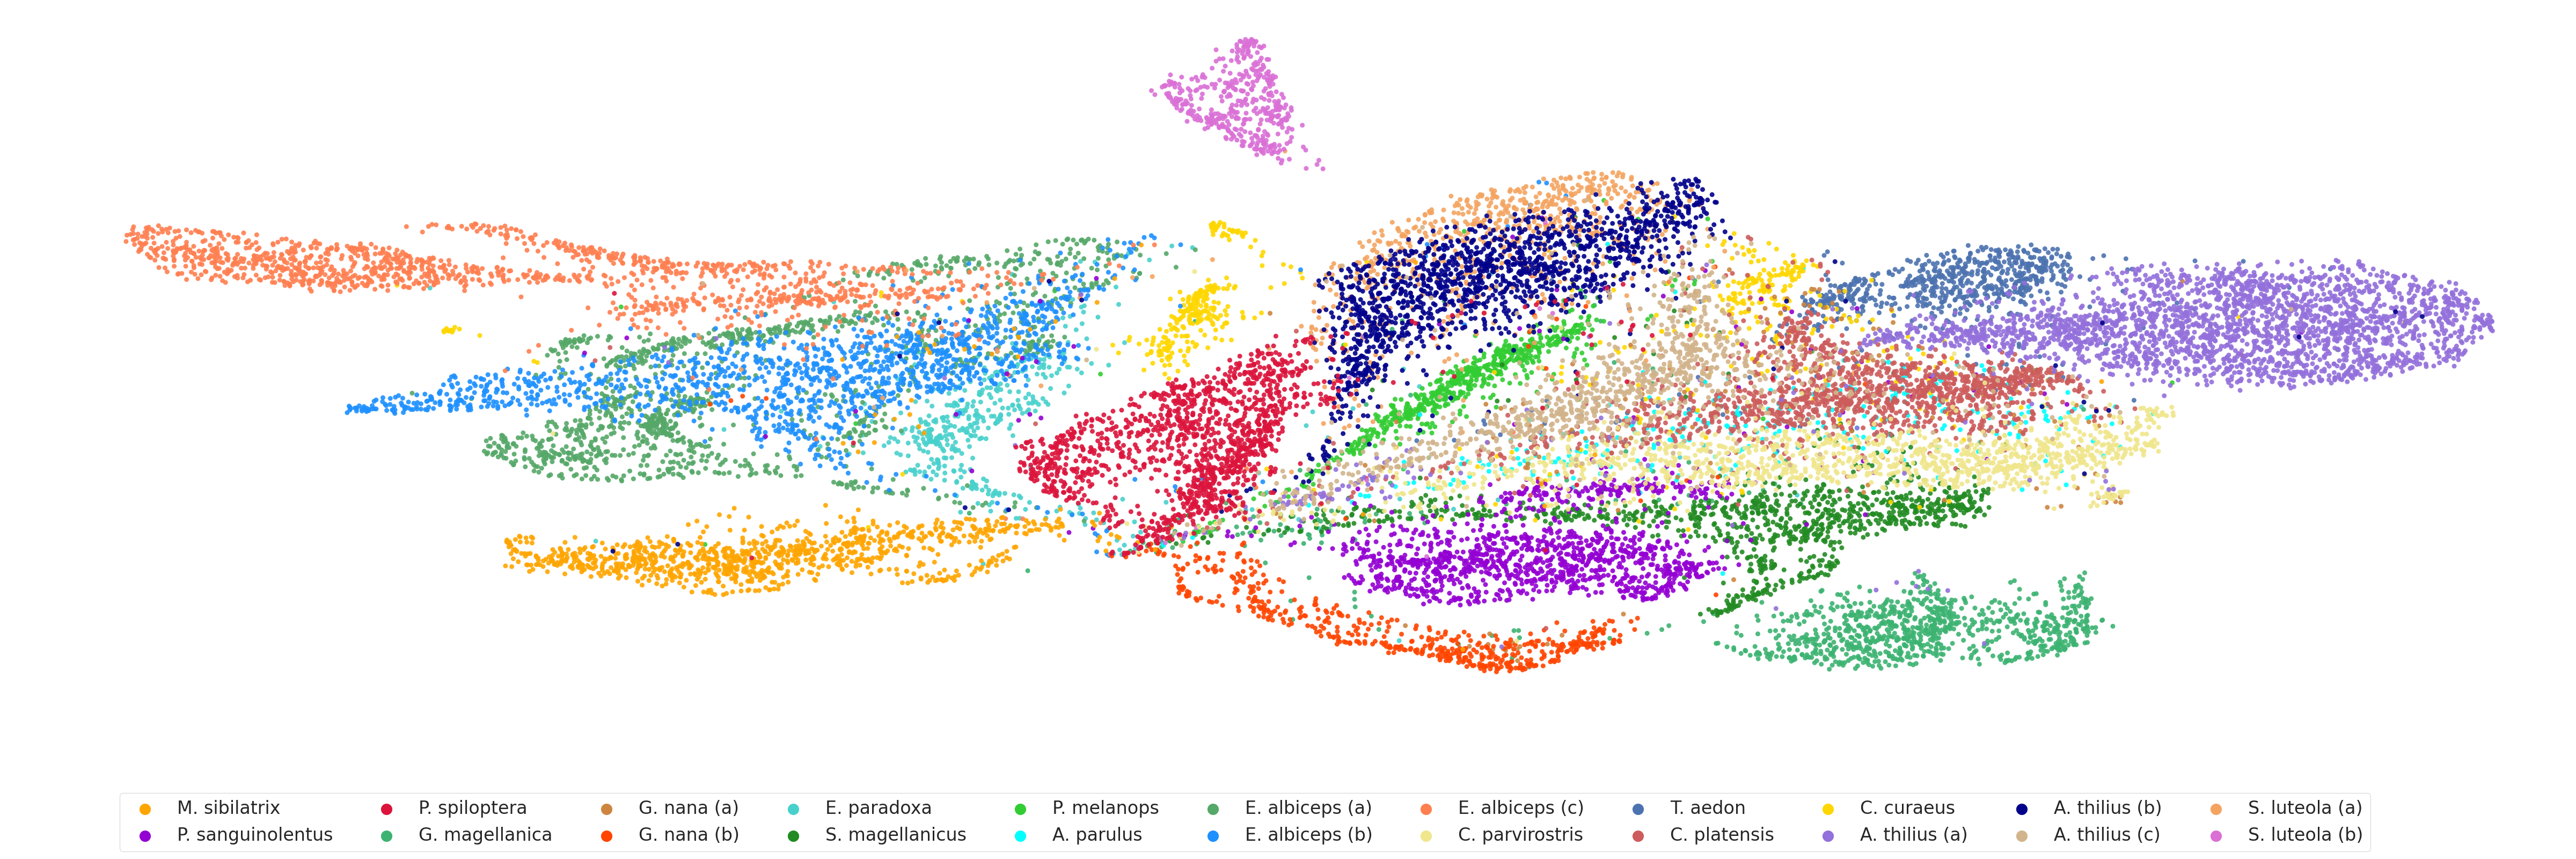

/home/gabsoni/miniconda3/envs/exp2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [24]:
plt.figure(figsize=(26,21))
#plt.figure(figsize=(6,4))
sns.set(style='white')
sns.set(rc={'axes.facecolor':'#FFFFFF'})


palette = sns.color_palette(colors)

ax = sns.scatterplot(embedding[:,0], 
                     embedding[:, 1], 
                     hue=hue, 
                     hue_order = order_sp,
                     legend=False,
                     palette=palette, 
                     s=65,
                     #s=5,
                     alpha=0.9, 
                     linewidth=0)


#sns.move_legend(ax, "lower left", 
#                bbox_to_anchor=(0.098, -0.007), 
#                borderaxespad=-8, 
#                ncol=5, 
#                title=None, 
#                frameon=True, 
#                fontsize=30, 
#                markerscale=3,
#               facecolor='white')

plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0, 1.135, 1.0])
plt.tight_layout()
plt.savefig('UMAP_CH_22class_v3.png', format='png', dpi=300)
plt.show()
